In [4]:
import numpy as np
import pandas as pd

# All the direct flights from Tallinn airport 
cities = pd.read_csv('otselennud.csv', delimiter=";")
other_data = pd.read_csv('airport_data.csv')
# Add coordinates to the data file
merged = pd.merge(cities, other_data, on='IATA', how='left')

merged.to_csv('final.csv')

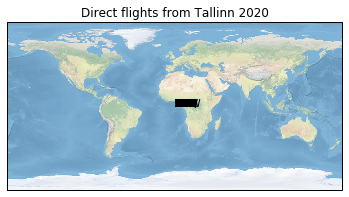

In [80]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


ny_lon, ny_lat = -75, 43
tll_marker, tll_lon, tll_lat = 'TLL', 24.8327999115, 59.41329956049999
	
#plt.figure() # figsize=(20, 20)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#ax.coastlines(resolution='50m')
#ax.gridlines()

for i, row in merged.iterrows():
    marker, lat, lon = (row['IATA'], row['Latitude'], row['Longitude'])
    #plt.plot([lon, tll_lon], [lat, tll_lat], color="green", linwidth=1, marker='o', transform=ccrs.Geodetic())
    #plt.plot([lat, lon])

    plt.text(0, 0, marker,
         horizontalalignment='left',
         transform=ccrs.Geodetic())


plt.title('Direct flights from Tallinn 2020')
plt.show()